Basic plotting in R - barplots and pie charts
=============================================

**Author:** Marcus Birkenkrahe




# Table of Contents







## What's in it for you?



![img](../img/whiskers.jpg)

-   Why visualization? What does it depend on?
-   What types of charts are there?
-   Barplots and pie charts
-   Histograms
-   Box-and-Whisker Plots
-   Scatterplots
-   Using base R and ggplot2
    
    Source: Davies (2016), chapter 14, pp. 289-308.



## When do we visualize data? When don't we?



![img](../img/9_bigpicture.jpg)
> Data visualization is important for EXPLORATION and for DOCUMENTATION:
> 
> 1) During data **exploration** (EDA), we visualize to see **patterns** rather
>    than rely on summary statistics and numbers only
> 
> 2) During data **storytelling**, we document and communicate insights
>    using graphs rather than tables (raw numbers)
> 
> It's easy to miss **relevant details** in graphs, and it's easy to miss
> the **big picture** in tables.\* What does visualization depend on?

![img](../img/9_viz.png)
(Source: r-charts.com - base R and ggplot2 examples)

> 
> 1) Raw/transformed data (observations and experiments)
> 
> 2) Available/affordable tools (computing and infrastructure)
> 
> 3) Variable types/style (related to the programming language)
> 
> 4) Skill/Benefit (data scientists and data science customers)
> \* About lists
![img](../img/eatpraylove.jpg)

-   Lists should always be ordered by priority, and aligned by type.

-   The poster suggests a priority: eating comes before praying comes
    before loving. Different people have different priorities!

-   The following example fails on both categories: the priority order
    is a time order, and it is broken, and the list mixes nouns and
    verbs:

>   1) Going home
>   2) Go to sleep
>   3) Supper

-   Better:

>   1) Going home
>   2) Eating supper
>   3) Going to sleep



## What types of visualizations are there?



![img](../img/9_chart_types.png)
(Source: r-graph-gallery.com)
> - Plots with bars (bar plot, histogram, lollipop, dotplot, pie chart)
> 
> - Plots with curves (density, ridgeline)
> 
> - Plots with points (scatterplot, bubbleplot, correlogram, line plot)
> 
> - Plots with areas (mosaicplot, boxplot, violinplot)
> 
> - Plots with trees (treemap, dendrogram)



## Barplots and Pie charts



![img](../img/9_piebar.png)

-   Barplots and pie charts are used to visualize **qualitative** data by
    **category frequency**

-   The height of the bars of a **barplot** indicate the frequency or count
    of each category

-   The size of the segment of the **pie chart** indicate the frequency or
    count of each category



## Frequency tables



-   Frequencies can be computed using the `table` function

-   Example: look at the dataset `ToothGrowth` - it has two `numeric` and
    one `factor` variable.



In [1]:
str(ToothGrowth)
tg <- ToothGrowth

: 'data.frame':	60 obs. of  3 variables:
  :  $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
  :  $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
  :  $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...

-   Compute the frequencies for the variables of `ToothGrowth`:



In [1]:
table(tg$len)
table(tg$supp)
table(tg$dose)

#+begin_example

   4.2  5.2  5.8  6.4    7  7.3  8.2  9.4  9.7   10 11.2 11.5 13.6 14.5 15.2 15.5 
     1    1    1    1    1    1    1    1    2    2    2    1    1    3    2    1 
  16.5 17.3 17.6 18.5 18.8 19.7   20 21.2 21.5 22.4 22.5   23 23.3 23.6 24.5 24.8 
     3    2    1    1    1    1    1    1    2    1    1    1    2    2    1    1 
  25.2 25.5 25.8 26.4 26.7 27.3 29.4 29.5 30.9 32.5 33.9 
     1    2    1    4    1    2    1    1    1    1    1

  OJ VC 
  30 30

  0.5   1   2 
   20  20  20
  #+end_example

-   What do these results mean? Which questions does each `table` result
    answer?

>   How many observations correspond to the values of `len`, `supp` and
>   `dose`?

-   What kind of R data structure is this frequency table? What
    structure does a table have? Is the table named or unnamed?



In [1]:
tbl <- table(ToothGrowth$supp)
class(tbl) 
str(tbl)
names(tbl)

: [1] "table"
  :  'table' int [1:2(1d)] 30 30
  :  - attr(*, "dimnames")=List of 1
  :   ..$ : chr [1:2] "OJ" "VC"
  : [1] "OJ" "VC"

## How to build a barplot



![img](../img/errorbar.png)

-   A barplot draws vertical or horizontal bars separated by white
    space, to visualize frequencies according to the relevant categories

-   You can visualize raw quantities (i.e. counts), or functions of
    them, like the `mean` or proportions

-   For more than one variable, the bars can be stacked or dodged (drawn
    next to one another)

-   Example: to build barplots for any variable, we merely pass the
    frequency table to the `barplot` function. The value of each table
    entry determines the height of the bar: `barplot(table(var))`



## Building a barplot for `mtcars`



-   As an example let's use `mtcars`, which contains characteristics of 32
    classic performance cars in the mid-1970s.

-   Print the first 5 rows of the data frame `mtcars`



In [1]:
head(mtcars,5)

:                    mpg cyl disp  hp drat    wt  qsec vs am gear carb
  : Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
  : Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
  : Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
  : Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
  : Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2

-   Fun fact: The unit of horsepower [hp] is equivalent fo a horse
    moving 33,000 pounds of mass 1 foot in 1 minute [lbs x ft / min]

-   We're only interested in one variable, `cyl`, the number of cylinders
    of the cars listed.

-   We use `table` to find out how many cars have how many cylinders and
    store the result in `cyl.freq`



In [1]:
cyl.freq <- table(mtcars$cyl)
cyl.freq

: 
  :  4  6  8 
  : 11  7 14

-   We create a barplot of the cylinder frequencies in `mtcar`



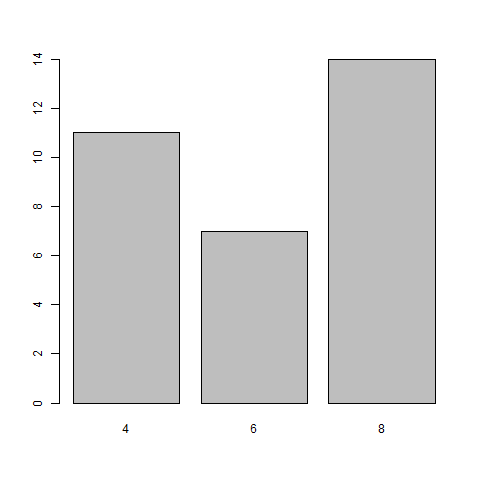

In [1]:
barplot(cyl.freq)

-   The plot displays the number of 4-, 6- and 8-cylinder cars in the
    data set but without annotations it's not clear what is summarized



## Annotating a barplot



-   Annotating a barplot works no different than annotating any plot,
    which is a great advantage of base R plotting

-   The `barplot` function has a bunch of parameters, which you can view
    with `help` (if you run this in Org-mode, you have to quit with `C-g`)



In [1]:
##  help(barplot)

-   For the simplest annotation, we need:
    1.  title (`main`)
    2.  x-axis label (`xlab`)
    3.  y-axis label (`ylab`)

-   Customization for the barplot of `cyl.freq`:



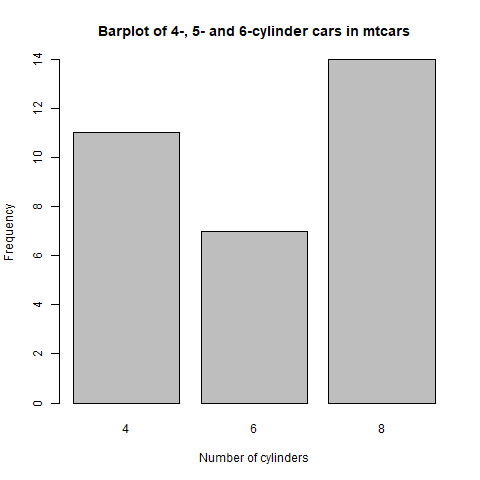

In [1]:
barplot(
  height = cyl.freq,
  main = "Barplot of 4-, 5- and 6-cylinder cars in mtcars",
  xlab = "Number of cylinders",
  ylab = "Frequency"
)

## Practice: building a simple barplot



1.  Check the `help` for the `read.csv` function. What's the difference
    between `read.csv` and `read.csv2`?

>    The separator between the data is `,` for `read.csv` and `;` for
>    `read.csv2`.

1.  What is the meaning of the parameter `stringsAsFactors`?

>    Setting this parameter to `TRUE` converts all `character` vectors to
>    `factor` vectors.

1.  Save the file at [https://tinyurl.com/spdnvxbr>](https://tinyurl.com/spdnvxbr>)as a data frame using
    `read.csv`. Look at the file to check if `header` should be `TRUE` or
    `FALSE`, and set `stringsAsFactors=TRUE`.



In [1]:
df <- read.csv(file="https://tinyurl.com/spdnvxbr",
               header=TRUE,
               stringsAsFactors=TRUE)

1.  Save the file again as a data frame `dnf` but this time do **not** set
    `stringsAsFactors` to `TRUE`. Print the structure of `dnf`.



In [1]:
dnf <- read.csv(file="https://tinyurl.com/spdnvxbr",
                header=TRUE)
str(dnf)

: 'data.frame':	10 obs. of  4 variables:
   :  $ Weight: int  55 85 75 42 93 63 58 75 89 67
   :  $ Height: int  161 185 174 154 188 178 170 167 181 178
   :  $ Sex   : chr  "female" "male" "male" "female" ...
   :  $ Name  : chr  "Jane" "Jim" "Joe" "Carla" ...

1.  Change the `character` vectors to `factor` vectors in `dnf`.



In [1]:
dnf$Sex <- factor(dnf$Sex)
dnf$Name <- factor(dnf$Name)

1.  Use a function to check that `df` and `dnf` are identical.



In [1]:
identical(df,dnf)

: [1] TRUE

1.  Check the structure of the data frame `df`.



In [1]:
str(df)

: 'data.frame':	10 obs. of  4 variables:
   :  $ Weight: int  55 85 75 42 93 63 58 75 89 67
   :  $ Height: int  161 185 174 154 188 178 170 167 181 178
   :  $ Sex   : Factor w/ 2 levels "female","male": 1 2 2 1 2 2 1 2 2 1
   :  $ Name  : Factor w/ 10 levels "Carl","Carla",..: 7 8 9 2 1 3 6 4 5 10

1.  Print the data frame.



In [1]:
df

#+begin_example
      Weight Height    Sex  Name
   1      55    161 female  Jane
   2      85    185   male   Jim
   3      75    174   male   Joe
   4      42    154 female Carla
   5      93    188   male  Carl
   6      63    178   male Chris
   7      58    170 female  Dora
   8      75    167   male  Dave
   9      89    181   male Derek
   10     67    178 female Lucia
   #+end_example

1.  Compute the frequency table for the variable `Sex`, store it in
    `sex.freq` and print `sex.freq`.



In [1]:
sex.freq <- table(df$Sex)
sex.freq

: 
   : female   male 
   :      4      6

1.  What information does `sex.freq` contain? Write your answer below (as
    a full sentence).

>    The data frame contains observations on four female and six male
>    participants.

1.  Create a barplot for the `Sex` category and store it in the file
    `sex.png`.



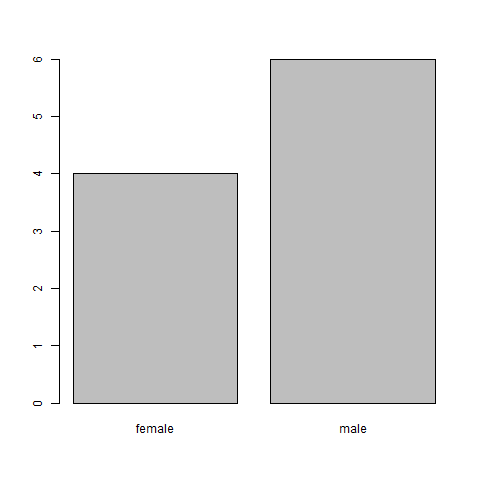

In [1]:
barplot(height = sex.freq)

1.  Annotate the barplot by adding the title "Barplot of the data set
    df", and x- and y-axis labels. Orient the axis labels horizontally
    by adding the parameter `las=1`.



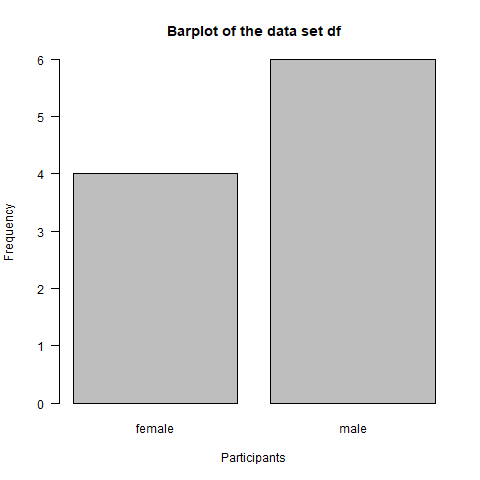

In [1]:
barplot(
  height = sex.freq,
  xlab = "Participants",
  ylab = "Frequency",
  main = "Barplot of the data set df",
  las = 1)

## Building stacked/dodged barplots



-   If you continue your exploration at this point in Org-mode, you can
    use `M-x org-babel-execute-buffer` to run all code blocks in this buffer

-   We're interested in cylinder and transmission information from the
    `mtcars` data set: for example, how many 4-cylinder cars have
    automatic transmission?



In [1]:
cylinders <- mtcars$cyl
transmission <- mtcars$am
table(cylinders)  # frequency table for all cars
table(cylinders[transmission == 0])  # table for automatic cars
table(cylinders[transmission == 0])["4"] # 4-cylinder automatic cars

: cylinders
  :  4  6  8 
  : 11  7 14
  : 
  :  4  6  8 
  :  3  4 12
  : 4 
  : 3

-   *Stacked* barplots have bars that are split up vertically

-   In *dodged* or *side-by-side* barplots, the bars are broken up and
    placed next to one another - the figure shows the contrast:
    
    ![img](../img/9_cylam.png)



## Frequency matrix



-   To make such plots, `barplot` needs a suitably arranged matrix as its
    first argument. E.g. for `cylinders` and `transmissions`, it shows the
    number of all cylinders associated with each transmission type:



In [1]:
cyl.freq.matrix <- table(transmission, cylinders)
cyl.freq.matrix

:             cylinders
  : transmission  4  6  8
  :            0  3  4 12
  :            1  8  3  2

-   The condition for `table` to cross-tabulate categorical variables (or
    vectors of discrete numeric values) is that the vectors have the
    **same length**.

-   Column vectors having the same length means that for each
    observation, values of both variables were recorded: each car in
    `mtcars` has a `cylinders` and a `transmission` value.

-   Each bar of the barplot corresponds to a column of the supplied
    matrix, and it is further split by the row values.

-   Creating the barplot:



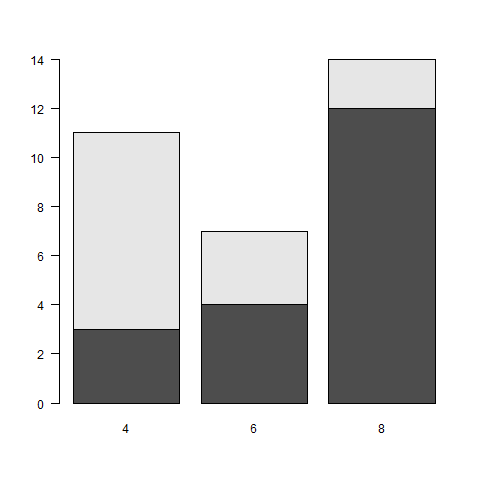

In [1]:
barplot(cyl.freq.matrix,
        las = 1) # label orientation

-   Each bar/column of the plot corresponds to a column of the
    categorical variable on the x-axis. Let's customize it!



## Customizing barplots



-   There are a LOT of potential parameters in `help(barplot)` with the
    default values. To find `las`, you need to check `par` (graphics).
    
        barplot(height, width = 1, space = NULL,
                names.arg = NULL, legend.text = NULL, beside = FALSE,
                horiz = FALSE, density = NULL, angle = 45,
                col = NULL, border = par("fg"),
                main = NULL, sub = NULL, xlab = NULL, ylab = NULL,
                xlim = NULL, ylim = NULL, xpd = TRUE, log = "",
                axes = TRUE, axisnames = TRUE,
                cex.axis = par("cex.axis"), cex.names = par("cex.axis"),
                inside = TRUE, plot = TRUE, axis.lty = 0, offset = 0,
                add = FALSE, ann = !add && par("ann"),
                args.legend = NULL, ...)

-   Let's look at some of these, which we will customize later:
    1.  `height` is a non-optional argument (vector or matrix)
    2.  `horiz = FALSE` means bars are drawn vertically (first on the
        left); if `TRUE`, bars are drawn horizontally (first at bottom)
    3.  `names.arg = NULL` means that names for each bar are taken from the
        `names` attribute of `height` if it is a vector, or the column
        names if it is a matrix (which is what happened here):



In [1]:
colnames(cyl.freq.matrix)

: [1] "4" "6" "8"

1.  `beside = FALSE` means stacked bars, `TRUE` means side-by-side bars
    1.  `legend.text` is a quick way to add a legend (always useful)

2.  We already know how to add a title and x- and y-axis labels:



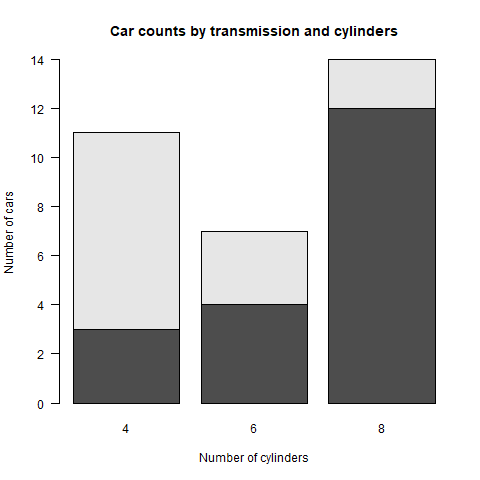

In [1]:
barplot(cyl.freq.matrix,
        las = 1,
        main = "Car counts by transmission and cylinders",
        xlab = "Number of cylinders",
        ylab = "Number of cars")

-   Change the x-axis names to more meaningful values with `names.arg`:



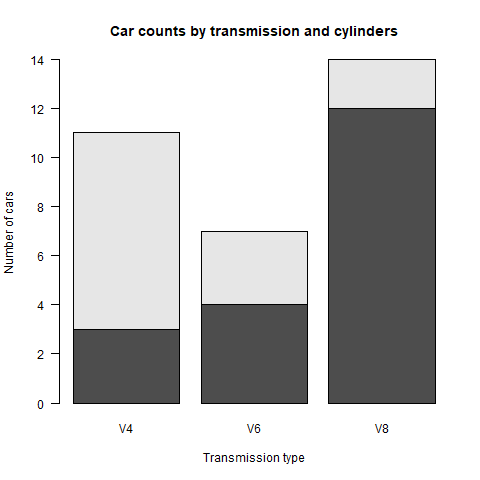

In [1]:
barplot(cyl.freq.matrix,
        las = 1,
        main = "Car counts by transmission and cylinders",
        xlab = "Transmission type",
        ylab = "Number of cars",
        names.arg = c("V4", "V6", "V8"))

-   Add a legend using `legend.text`:



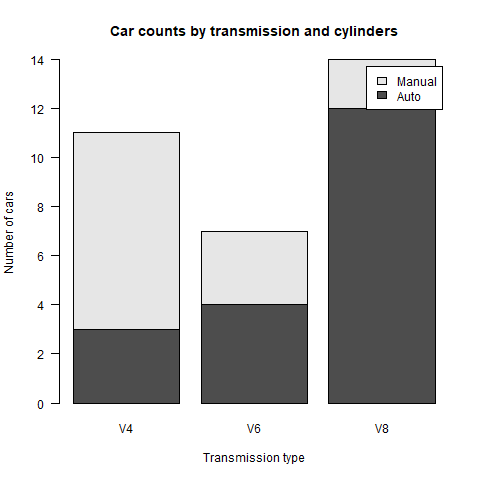

In [1]:
barplot(cyl.freq.matrix,
        las = 1,
        main = "Car counts by transmission and cylinders",
        xlab = "Transmission type",
        ylab = "Number of cars",
        names.arg = c("V4", "V6", "V8"),
        legend.text = c("Auto", "Manual"))

-   We don't want the legend to overlap with the bars: we use
    the `args.legend` parameter to change the position:



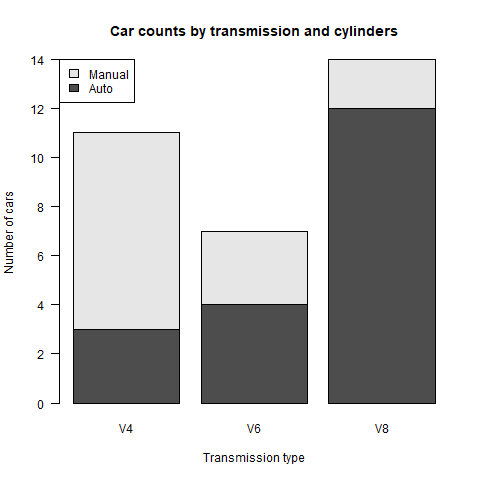

In [1]:
barplot(cyl.freq.matrix,
        las = 1,
        main = "Car counts by transmission and cylinders",
        xlab = "Transmission type",
        ylab = "Number of cars",
        names.arg = c("V4", "V6", "V8"),
        legend.text = c("Auto", "Manual"),
        args.legend = list(x="topleft"))

-   Turning it on its side changing the parameter `horiz` to `TRUE` (and
    moving the legend to center `right`):



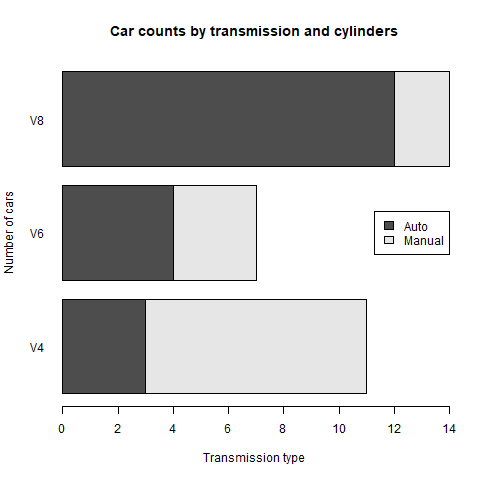

In [1]:
barplot(cyl.freq.matrix,
        las = 1,
        main = "Car counts by transmission and cylinders",
        xlab = "Transmission type",
        ylab = "Number of cars",
        names.arg = c("V4", "V6", "V8"),
        legend.text = c("Auto", "Manual"),
        args.legend = list(x="right"),
        horiz = TRUE)

-   Finally, let's look at the dodged version of this plot:



dodged

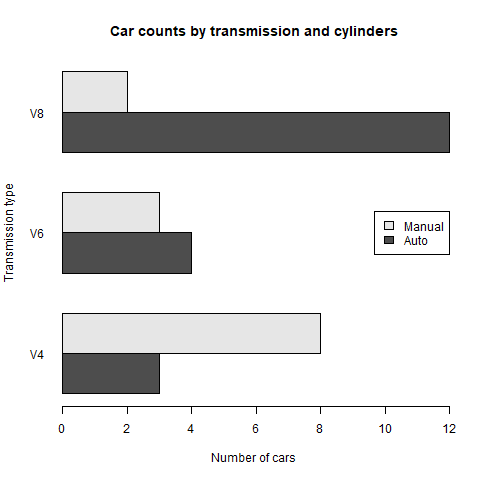

In [1]:
barplot(cyl.freq.matrix,
        las = 1,
        main = "Car counts by transmission and cylinders",
        ylab = "Transmission type",
        xlab = "Number of cars",
        names.arg = c("V4", "V6", "V8"),
        legend.text = c("Auto", "Manual"),
        args.legend = list(x="right"),
        horiz = TRUE,
        beside = TRUE)

-   Especially for stacked plots, it might be good to see the values
    attached to the bars. There is no parameter to do this, we must use
    `text`: the `labels` inside the function use the `numeric` values and
    convert them to `character` values for printing.

-   For completeness: both final plots in a side-by-side plot array:



In [1]:
par(mfrow=c(1,2), pty='s')
barplot(cyl.freq.matrix,
        las = 1,
        xlab = "Transmission type",
        ylab = "Number of cars",
        names.arg = c("V4", "V6", "V8"),
        legend.text = c("Auto", "Manual"),
        args.legend = list(x="topleft",
                           cex=0.9))
title("Stacked vertical barplot",
      cex.main=0.9)
barplot(cyl.freq.matrix,
        las = 1,
        ylab = "Transmission type",
        xlab = "Number of cars",
        names.arg = c("V4", "V6", "V8"),
        legend.text = c("Auto", "Manual"),
        args.legend = list(x="right",
                           cex=0.9),
        horiz = TRUE,
        beside = TRUE)
title("Stacked horizontal barplot",
      cex.main=0.9)

## Barplots with ggplot2



-   The ggplot2 package is an alternative to base R plotting

-   It it based on the "grammar of graphics" methodology: customization
    is layered on top of the raw data plot using the `+` operator

-   You can use `ggplot` to make this plot but the layers stay the same
    
    ![img](../img/7_gg.png)

-   Unlike base R, ggplot2 requires `data.frame` format, and is more picky

-   The ([deprecated](https://ggplot2.tidyverse.org/reference/qplot.html)) function `ggplot2::qplot` is a shortcut that looks
    like `plot`: the code below produces a basic barplot from `mtcars$cyl`



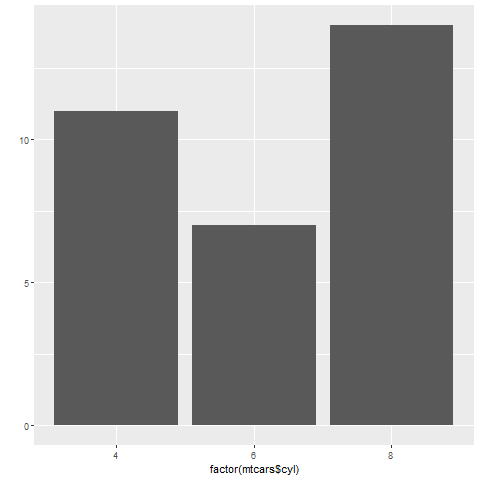

In [1]:
library(ggplot2)
qplot(factor(mtcars$cyl), geom="bar")

-   Here, the relevant "geometry" is `"bar"` and the `numeric` variable must
    be supplied as a `factor` to allow treating it like a category

-   To get this plot with `barplot` in base R, you need the frequency
    `table` function but you don't need to change the vector to `factor`

-   To produce a ggplot2 version of the dodged barplot created earlier
    in base R, you can use this code:



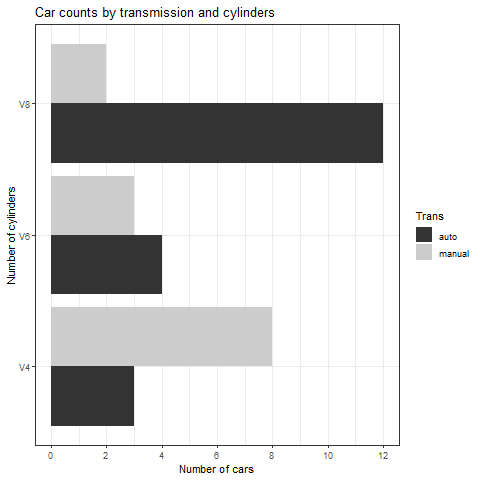

In [1]:
qplot(
  factor(mtcars$cyl),
  geom="blank",
  fill=factor(mtcars$am),
  xlab="Number of cylinders",
  ylab="Number of cars",
  main="Car counts by transmission and cylinders") +
  geom_bar(position="dodge") +
  scale_x_discrete(
    labels=c("V4", "V6", "V8")) +
  scale_y_continuous(
    breaks=seq(0,12,2)) +
  coord_flip() +
  theme_bw() +
  scale_fill_grey(
    name="Trans",
    labels=c("auto","manual"))

-   Direct contrast between ggplot2 and base R code: the default in
    ggplot2 is color (you can [pick another theme](https://ggplot2.tidyverse.org/reference/ggtheme.html))
    
    ![img](../img/7_plots.png)

-   The default makes the code just as short as the base R solution:



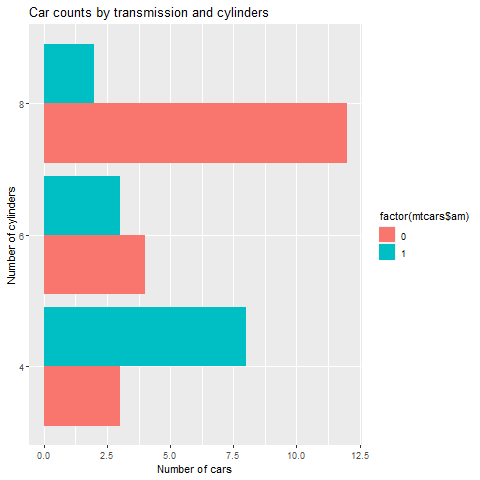

In [1]:
qplot(
  factor(mtcars$cyl),
  geom="blank",
  fill=factor(mtcars$am),
  xlab="Number of cylinders",
  ylab="Number of cars",
  main="Car counts by transmission and cylinders") +
  geom_bar(position="dodge") +
  coord_flip()

## Practice ggplot2



**Create a practice file `ggplot2.org` to work in: [tinyurl.com/3pjpbyvz](https://tinyurl.com/3pjpbyvz)**

1.  Create barplot for the `ToothGrowth` dataset:
    -   use the function `ggplot` with the arguments `data=ToothGrowth` and
        `aes(x=supp,y=len)`
    -   store the plot in an object `p`
    -   print `p`



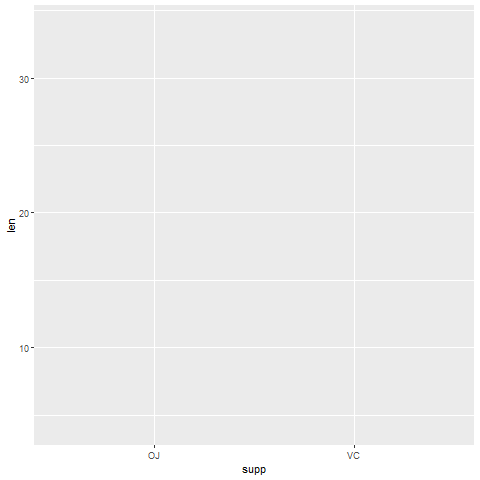

In [1]:
ggplot(
  data = ToothGrowth,
  aes(x=supp, y=len)) -> p
p

1.  Add a barplot geometry layer to the plot `p`:
    -   add (`+`) `geom_bar(stat="identity", width=0.8)`
    -   store the new plot in `p1` and print it
    -   note that adding with `+` on a new line gives an error!



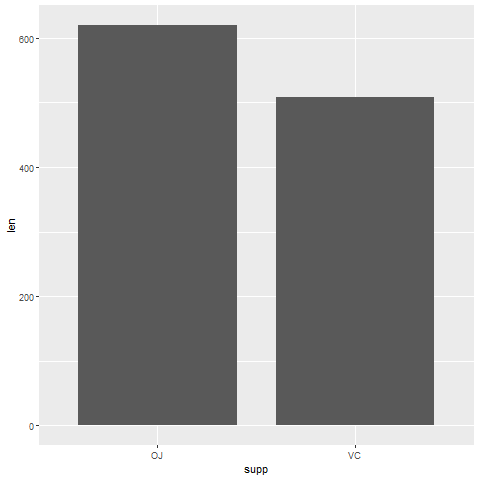

In [1]:
p +
  geom_bar(
    stat="identity",
    width=0.8) -> p1
p1

1.  Turn the plot on its side:
    -   Add `coord_flip()` to `p1`
    -   Store it in `p2` and print it



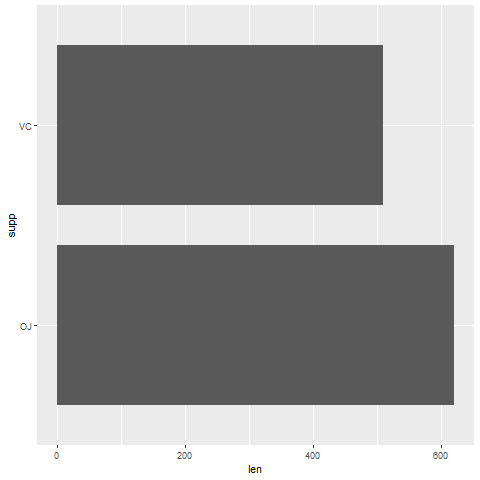

In [1]:
p +
  geom_bar(
    stat="identity",
    width=0.8) +
  coord_flip() -> p2
p2

1.  Using `ggplot`, make a stacked barplot of `ToothGrowth` which shows the
    dosage `dose` for each `supp` category, and add `theme_minimal`: save in
    `p3` and print plot



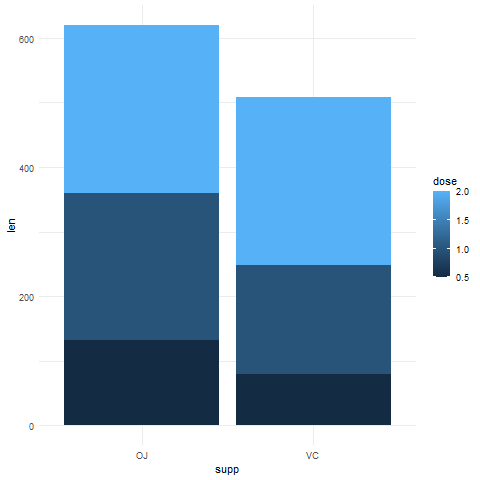

In [1]:
ggplot(
  data=ToothGrowth,
  aes(x=supp,
      y=len,
      fill=dose)) +
  geom_bar(stat="identity") +
  theme_minimal() -> p3
p3

## Pie charts with base R



-   Pie charts are an alternative to visualizing category frequencies

-   Pie slices represent relative counts of each categorical variable

-   Example: remember the `cylinders` in the `mtcars` data set?



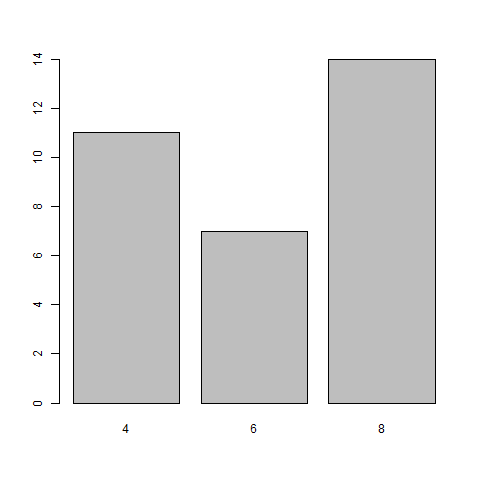

In [1]:
cyl.freq <- table(mtcars$cyl)
barplot(height=cyl.freq)

-   Use `pie` to create a pie chart:



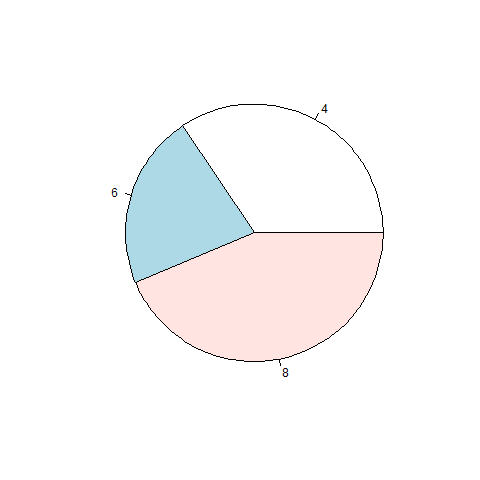

In [1]:
pie(x=cyl.freq)

-   Customize with parameters `label` (axis labels), `col` (color) and `main`
    (title):



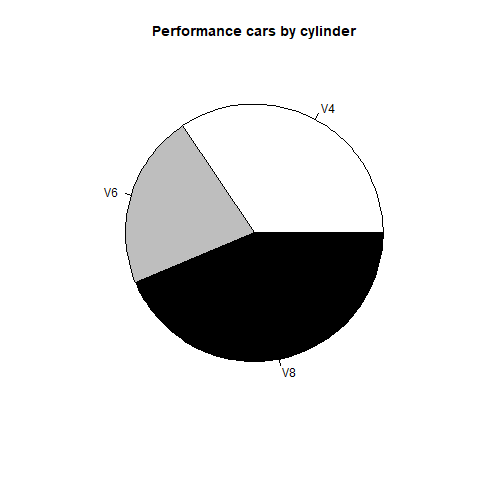

In [1]:
pie(
  x = cyl.freq,
  labels = c("V4", "V6", "V8"),
  col = c("white","gray","black"),
  main = "Performance cars by cylinder")

-   Both plots next to one another in a plot array



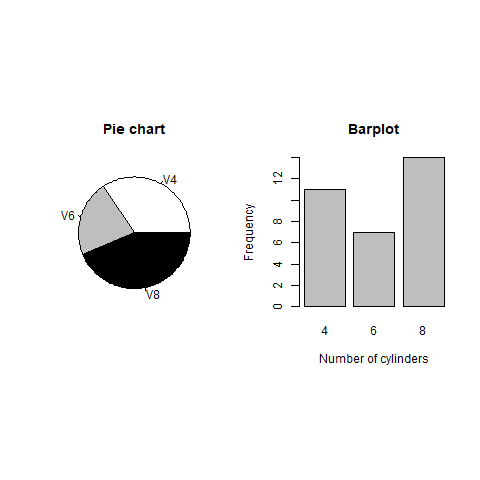

In [1]:
par(mfrow=c(1,2),pty='s')
cyl.freq <- table(mtcars$cyl)
pie(
  x = cyl.freq,
  labels = c("V4", "V6", "V8"),
  col = c("white","gray","black"),
  main = "Pie chart")
barplot(
  height = cyl.freq,
  main = "Barplot",
  xlab = "Number of cylinders",
  ylab = "Frequency"
)

## Pie charts with ggplot2



-   There's no pie chart geometry in ggplot2, you have to improvise:
    first build the data frame to be plotted:



In [1]:
value <- c(sum(mtcars$cyl == "4"),
           sum(mtcars$cyl == "6"),
           sum(mtcars$cyl == "8"))
value
group <- c("V4","V6","V8")
group
data <- data.frame(value,group)
data

: [1] 11  7 14
  : [1] "V4" "V6" "V8"
  :   value group
  : 1    11    V4
  : 2     7    V6
  : 3    14    V8

-   Then plot as a barplot with polar coordinates:



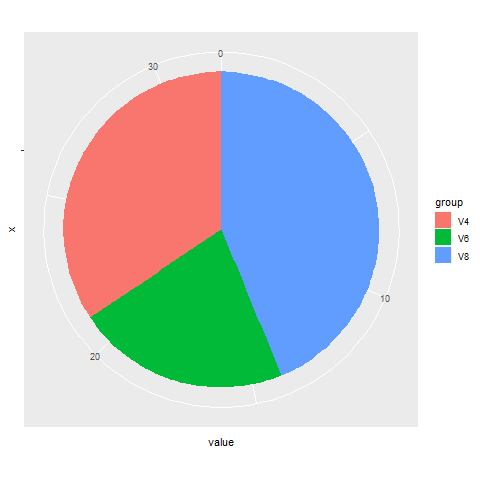

In [1]:
ggplot(data,
       aes(x="", y=value, fill=group)) +
  geom_bar(width=1, stat="identity") +
  coord_polar("y", start=0)

-   Pie charts are only useful when you have few categories that are
    unordered. As soon as you want to display a second variable, or if
    you have more than a few levels, bar charts are to be preferred.



## References



-   ["ggplot2 barplots: Quick start guide", sthda.com](http://www.sthda.com/english/wiki/ggplot2-barplots-quick-start-guide-r-software-and-data-visualization)

